<a href="https://colab.research.google.com/github/abhishekp2011/insurance/blob/main/101918063_insurance_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Importing all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")

In [37]:
#load and check the shape .
data = pd.read_csv("/insurance.csv")
data.shape

(1338, 7)

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
#check the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
#checking the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0

[5 rows x 12 columns]


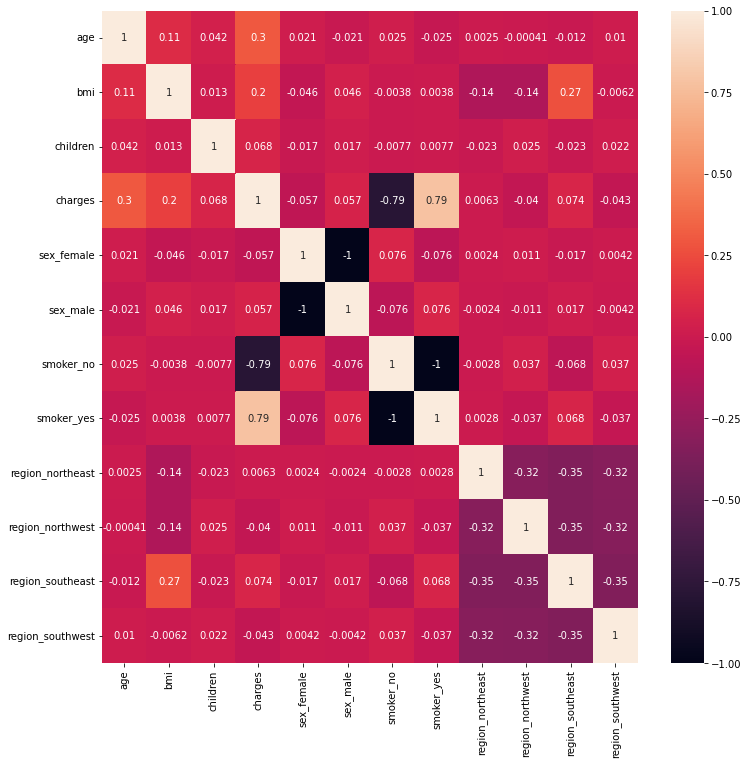

In [41]:
# Converting categorical variable into dummy/indicator variables.
data = pd.get_dummies(data, columns=["sex", "smoker", "region"])
print(data.head())

#check correlation with heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True)

In [42]:
data.drop(columns=["sex_female", "smoker_no"], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


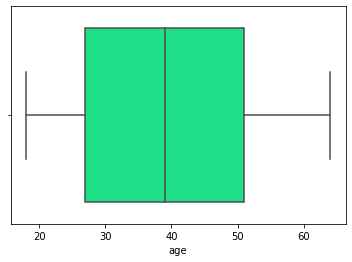

In [43]:
#checking for outlier in age col...
sns.boxplot(data["age"],palette="gist_rainbow")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


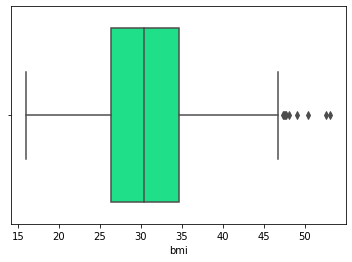

In [44]:

#outliers in bmi col...
sns.boxplot(data["bmi"],palette="gist_rainbow")

In [45]:
#With this function we detect the outliers 
def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    #let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

        #finally, let find the outlier
    outliers=data[(data>highest) | (data<lowest)]
        

    return outliers


In [46]:
#outliers detection and remove  
new=pd.DataFrame(data["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(data[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    data=data.drop(test.index,axis=0)
    # print(data)                        #drop the outliers by thier index
   

columns name : bmi
numbers of outliers: 4


116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [47]:
# data.head()
# # print(data)

In [48]:
target = data["charges"]
features = data.drop(columns=["charges"])

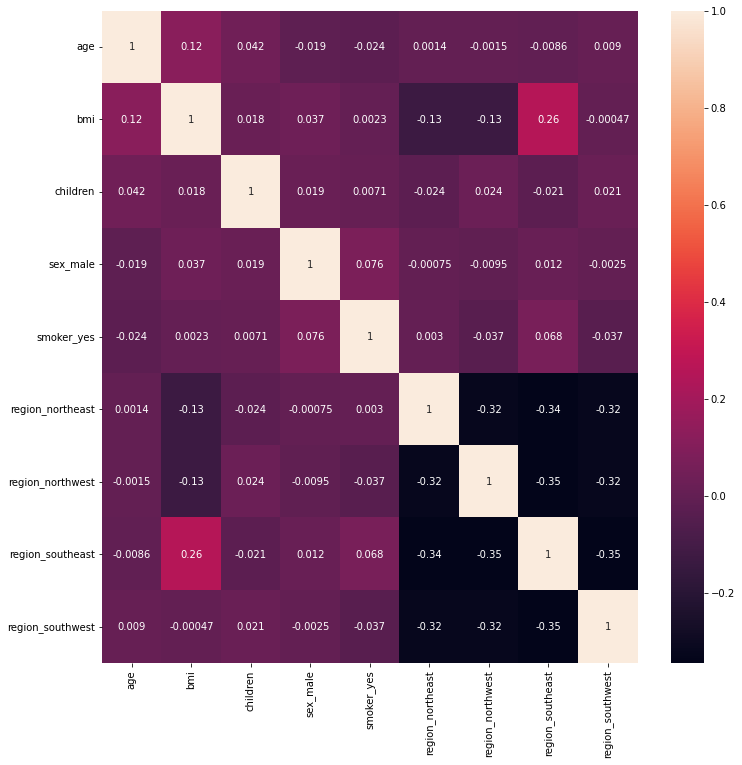

In [49]:
#check correlation with heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(features.corr(), annot=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10, test_size=0.25)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# print(X_train_scaled)
# print(X_test_scaled)

In [58]:
list_of_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]
for model in list_of_models:
    # print(model.__str__()[0])
    print("Model name: ",model)
    print(cross_val_score(model, X_train_scaled, y_train).mean())
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print("R2 score :--->>",r2_score(y_test,y_pred))
    print()

Model name:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.7518661372309303
R2 score :--->> 0.7184316900641456

Model name:  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.6910141073463166
R2 score :--->> 0.672681425364634

Model name:  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
              